# Fashion MNIST data set 

In [1]:
pip install torch torchvision scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


Training shape: (60000, 784)
Test shape: (10000, 784)
Training Logistic Regression model...


/Users/anu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



✅ Accuracy: 84.45%

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.97      0.96      0.97      1000
           2       0.73      0.74      0.73      1000
           3       0.83      0.86      0.84      1000
           4       0.74      0.77      0.75      1000
           5       0.94      0.92      0.93      1000
           6       0.63      0.57      0.60      1000
           7       0.91      0.94      0.93      1000
           8       0.93      0.93      0.93      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



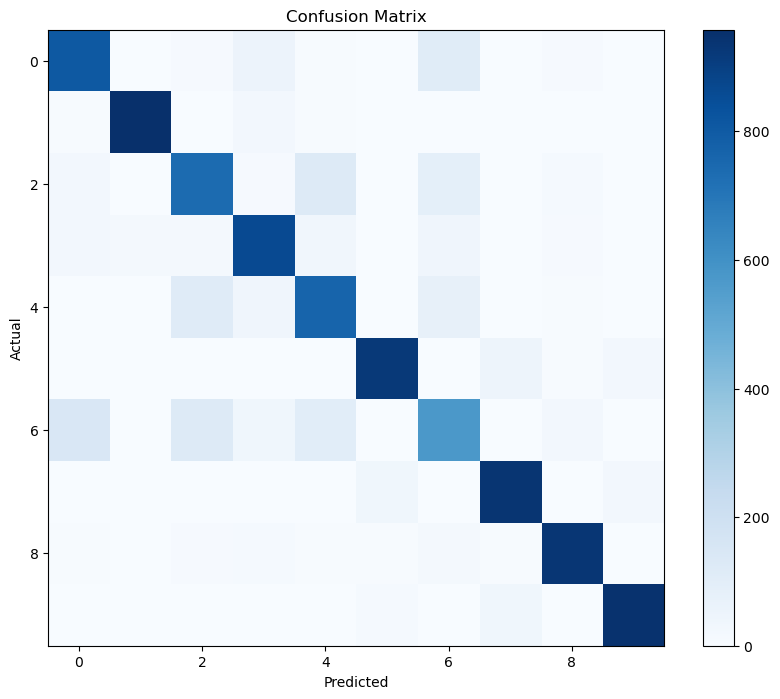

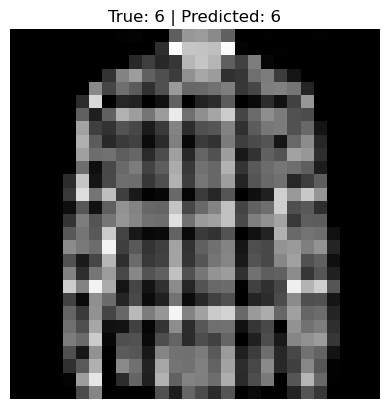

In [3]:
import torch
from torchvision import datasets, transforms
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)


def dataset_to_numpy(dataset):
    X = []
    y = []
    for img, label in dataset:
        X.append(img.view(-1).numpy())  
        y.append(label)
    return np.array(X), np.array(y)

X_train, y_train = dataset_to_numpy(train_data)
X_test, y_test = dataset_to_numpy(test_data)

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)


print("Training Logistic Regression model")
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {accuracy * 100:.2f}%")

print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


plt.figure(figsize=(10, 8))
plt.imshow(confusion_matrix(y_test, y_pred), cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()


idx = 7 
sample = X_test[idx].reshape(28, 28)

plt.imshow(sample, cmap='gray')
plt.title(f"True: {y_test[idx]} | Predicted: {model.predict([X_test[idx]])[0]}")
plt.axis('off')
plt.show()


/Users/anu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8333
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1000
           1       0.96      0.95      0.96      1000
           2       0.73      0.72      0.73      1000
           3       0.82      0.84      0.83      1000
           4       0.71      0.77      0.74      1000
           5       0.93      0.89      0.91      1000
           6       0.62      0.56      0.59      1000
           7       0.91      0.94      0.92      1000
           8       0.91      0.93      0.92      1000
           9       0.93      0.94      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



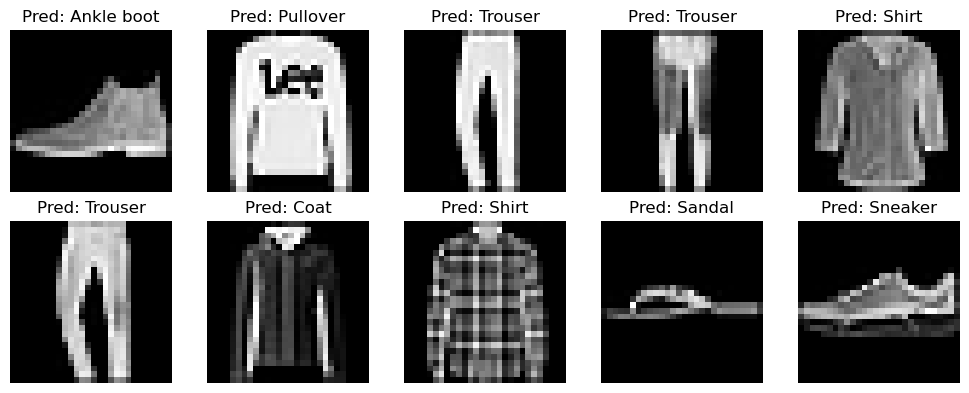

In [6]:
import torch
from torchvision import datasets, transforms
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. Load and preprocess data
transform = transforms.ToTensor()
train_data = datasets.FashionMNIST(root='data', train=True, transform=transform, download=True)
test_data = datasets.FashionMNIST(root='data', train=False, transform=transform, download=True)

# Flatten data
X_train = train_data.data.view(-1, 28*28).numpy()
y_train = train_data.targets.numpy()
X_test = test_data.data.view(-1, 28*28).numpy()
y_test = test_data.targets.numpy()

# 2. Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 3. Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 4. Visualize predictions
labels_map = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {labels_map[y_pred[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


 Dataset loaded.
Training shape: (60000, 784)
Test shape: (10000, 784)

 Logistic Regression Results:
 Accuracy: 84.45%
 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.97      0.96      0.97      1000
           2       0.73      0.74      0.73      1000
           3       0.83      0.86      0.84      1000
           4       0.74      0.77      0.75      1000
           5       0.94      0.92      0.93      1000
           6       0.63      0.57      0.60      1000
           7       0.91      0.94      0.93      1000
           8       0.93      0.93      0.93      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



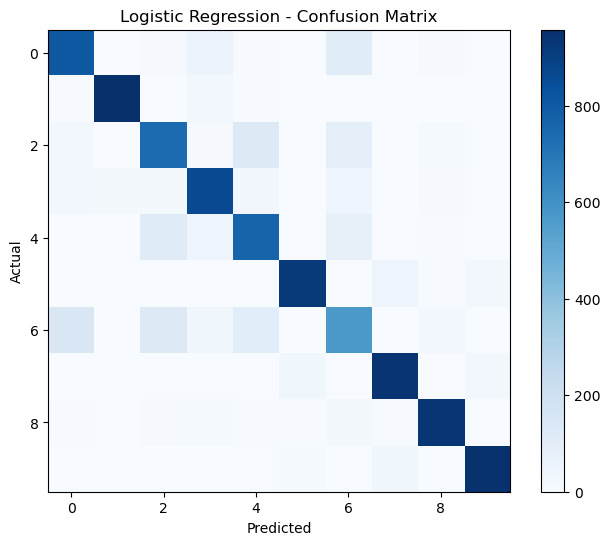


 Linear Regression Results:
 Accuracy: 38.60%
 Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.23      0.34      1000
           1       0.66      0.61      0.64      1000
           2       0.21      0.21      0.21      1000
           3       0.29      0.46      0.36      1000
           4       0.33      0.49      0.40      1000
           5       0.39      0.44      0.41      1000
           6       0.09      0.08      0.09      1000
           7       0.51      0.55      0.53      1000
           8       0.33      0.26      0.29      1000
           9       0.72      0.52      0.60      1000

    accuracy                           0.39     10000
   macro avg       0.42      0.39      0.39     10000
weighted avg       0.42      0.39      0.39     10000



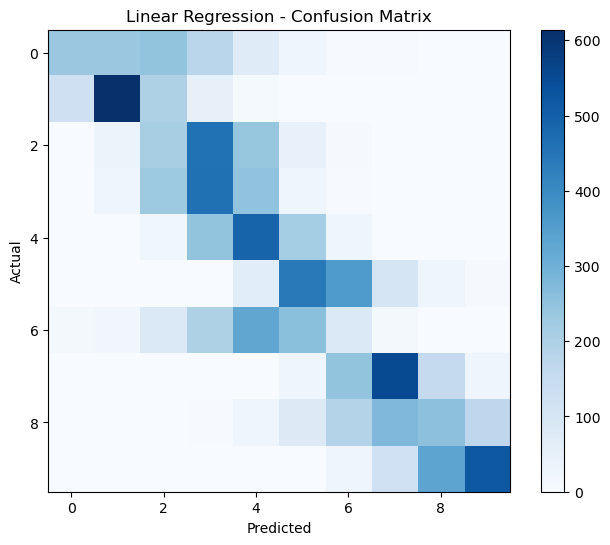


 Decision Tree Results:
 Accuracy: 79.19%
 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.76      1000
           1       0.95      0.94      0.95      1000
           2       0.64      0.66      0.65      1000
           3       0.81      0.78      0.80      1000
           4       0.66      0.64      0.65      1000
           5       0.91      0.89      0.90      1000
           6       0.53      0.56      0.55      1000
           7       0.88      0.89      0.88      1000
           8       0.91      0.91      0.91      1000
           9       0.89      0.91      0.90      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



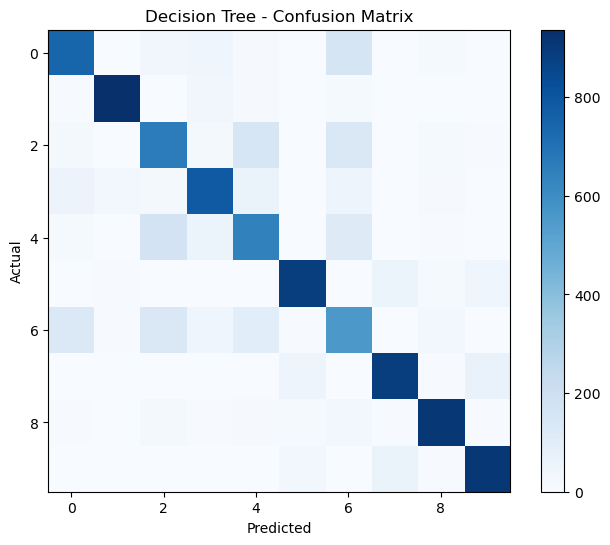


 SVM Results:
 Accuracy: 85.31%
 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.75      0.79      0.77      1000
           3       0.82      0.88      0.85      1000
           4       0.76      0.77      0.77      1000
           5       0.94      0.93      0.94      1000
           6       0.64      0.59      0.62      1000
           7       0.91      0.92      0.91      1000
           8       0.96      0.96      0.96      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



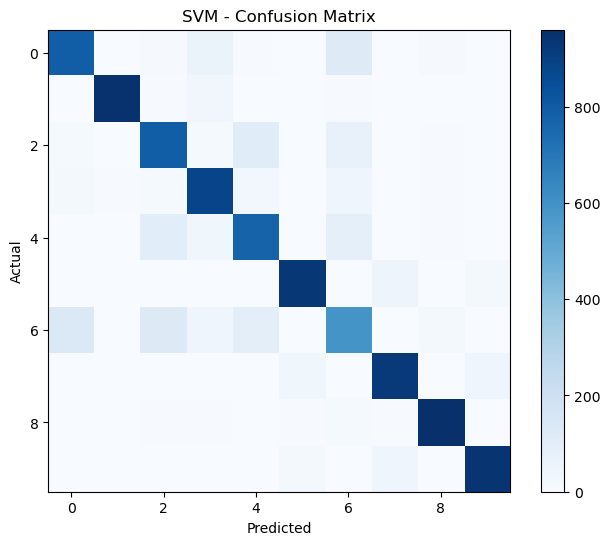


 Naive Bayes Results:
 Accuracy: 58.56%
 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.59      0.68      1000
           1       0.64      0.94      0.76      1000
           2       0.59      0.32      0.42      1000
           3       0.44      0.55      0.49      1000
           4       0.38      0.78      0.51      1000
           5       0.93      0.28      0.43      1000
           6       0.32      0.04      0.07      1000
           7       0.51      0.99      0.67      1000
           8       0.83      0.71      0.77      1000
           9       0.91      0.67      0.77      1000

    accuracy                           0.59     10000
   macro avg       0.64      0.59      0.56     10000
weighted avg       0.64      0.59      0.56     10000



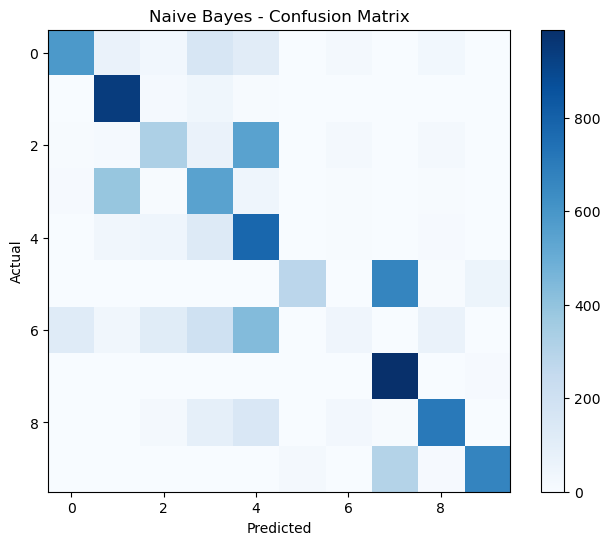

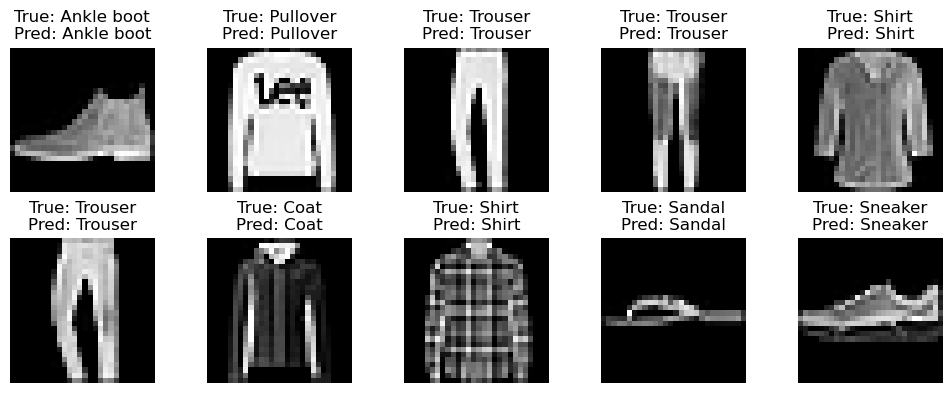

In [15]:
import torch
from torchvision import datasets, transforms
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset 
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)

# Convert to NumPy
def dataset_to_numpy(dataset):
    X, y = [], []
    for img, label in dataset:
        X.append(img.view(-1).numpy())  
        y.append(label)
    return np.array(X), np.array(y)

X_train, y_train = dataset_to_numpy(train_data)
X_test, y_test = dataset_to_numpy(test_data)

print(" Dataset loaded.")
print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)


def evaluate_model(name, model, X_test, y_test, is_classifier=True):
    y_pred = model.predict(X_test)
    if not is_classifier:
        y_pred = np.round(y_pred).astype(int)
        y_pred = np.clip(y_pred, 0, 9)
    print(f"\n {name} Results:")
    print(f" Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(" Classification Report:\n", classification_report(y_test, y_pred))
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix(y_test, y_pred), cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.colorbar()
    plt.show()
    
    

# 1. Logistic Regression
log = LogisticRegression(max_iter=1000)
log.fit(X_train, y_train)
evaluate_model("Logistic Regression", log, X_test, y_test)

# 2. Linear Regression (treated as classification)
linear = LinearRegression()
linear.fit(X_train, y_train)3
evaluate_model("Linear Regression", linear, X_test, y_test, is_classifier=False)

# 3. Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
evaluate_model("Decision Tree", tree, X_test, y_test)

# 4. SVM
svm = SVC()
svm.fit(X_train[:10000], y_train[:10000])  # SVM is slow on large datasets
evaluate_model("SVM", svm, X_test, y_test)

# 5. Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
evaluate_model("Naive Bayes", nb, X_test, y_test)

# 7. Sample prediction
labels_map = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
y_pred = log.predict(X_test[:10])

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {labels_map[y_test[i]]}\nPred: {labels_map[y_pred[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 1. Load and preprocess the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),  # Output: 32 x 28 x 28
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                         # Output: 32 x 14 x 14
            nn.Conv2d(32, 64, kernel_size=3, padding=1),# Output: 64 x 14 x 14
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                         # Output: 64 x 7 x 7
            nn.Flatten(),
            nn.Linear(64*7*7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)

model = CNN().to(device)

# 3. Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Train the model
epochs = 5
for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}")

# 5. Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')


Epoch [1/5], Loss: 0.4353
Epoch [2/5], Loss: 0.2781
Epoch [3/5], Loss: 0.2304
Epoch [4/5], Loss: 0.2014
Epoch [5/5], Loss: 0.1759
Test Accuracy: 91.14%


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 1. Load and preprocess the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. Define the Deep Neural Network (MLP)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)

model = MLP().to(device)

# 3. Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Train the model
epochs = 5
for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}")

# 5. Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')


Epoch [1/5], Loss: 0.5687
Epoch [2/5], Loss: 0.4152
Epoch [3/5], Loss: 0.3791
Epoch [4/5], Loss: 0.3592
Epoch [5/5], Loss: 0.3418
Test Accuracy: 87.00%


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 1. Load and preprocess the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. Define the Deep Neural Network (MLP)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)

model = MLP().to(device)

# 3. Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Train the model
epochs = 100
for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}")

# 5. Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')


Epoch [1/100], Loss: 0.5660
Epoch [2/100], Loss: 0.4164
Epoch [3/100], Loss: 0.3809
Epoch [4/100], Loss: 0.3608
Epoch [5/100], Loss: 0.3424
Epoch [6/100], Loss: 0.3315
Epoch [7/100], Loss: 0.3176
Epoch [8/100], Loss: 0.3072
Epoch [9/100], Loss: 0.3004
Epoch [10/100], Loss: 0.2909
Epoch [11/100], Loss: 0.2842
Epoch [12/100], Loss: 0.2798
Epoch [13/100], Loss: 0.2751
Epoch [14/100], Loss: 0.2660
Epoch [15/100], Loss: 0.2647
Epoch [16/100], Loss: 0.2571
Epoch [17/100], Loss: 0.2565
Epoch [18/100], Loss: 0.2483
Epoch [19/100], Loss: 0.2455
Epoch [20/100], Loss: 0.2406
Epoch [21/100], Loss: 0.2346
Epoch [22/100], Loss: 0.2356
Epoch [23/100], Loss: 0.2304
Epoch [24/100], Loss: 0.2270
Epoch [25/100], Loss: 0.2249
Epoch [26/100], Loss: 0.2230
Epoch [27/100], Loss: 0.2238
Epoch [28/100], Loss: 0.2154
Epoch [29/100], Loss: 0.2155
Epoch [30/100], Loss: 0.2105
Epoch [31/100], Loss: 0.2108
Epoch [32/100], Loss: 0.2064
Epoch [33/100], Loss: 0.2019
Epoch [34/100], Loss: 0.2013
Epoch [35/100], Loss: 0

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 5 * 5, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x

cnn_model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# Train CNN
epochs = 10
for epoch in range(epochs):
    cnn_model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = cnn_model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Evaluate CNN
cnn_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy of CNN: {100 * correct / total:.2f}%")


Epoch [1/10], Loss: 0.5211
Epoch [2/10], Loss: 0.3446
Epoch [3/10], Loss: 0.2938
Epoch [4/10], Loss: 0.2645
Epoch [5/10], Loss: 0.2399
Epoch [6/10], Loss: 0.2208
Epoch [7/10], Loss: 0.2027
Epoch [8/10], Loss: 0.1894
Epoch [9/10], Loss: 0.1732
Epoch [10/10], Loss: 0.1647
Test Accuracy of CNN: 91.56%


In [12]:
pip install pennylane pennylane-qiskit qiskit

  Obtaining dependency information for pennylane from https://files.pythonhosted.org/packages/9f/cf/acbf70cdf2664d18a9d8ff5f7843c2a4cd0f198c06153cb1337f1abfe904/PennyLane-0.41.1-py3-none-any.whl.metadata
  Obtaining dependency information for pennylane-qiskit from https://files.pythonhosted.org/packages/ba/bc/fbecc42368e9aa41a7c4db55e5f25e8666d123b29f4b57bd3a2f01c7833e/pennylane_qiskit-0.41.0.post0-py3-none-any.whl.metadata
  Obtaining dependency information for qiskit from https://files.pythonhosted.org/packages/d0/fb/c27db650f1d6d3f45012c11d45e2425755ba0100104a8f33f703754c66a8/qiskit-2.0.0-cp39-abi3-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for rustworkx>=0.14.0 from https://files.pythonhosted.org/packages/94/47/7e7c37fb73efcc87be6414b235534605c4008a4cdbd92a61db23b878eecd/rustworkx-0.16.0-cp39-abi3-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for autograd from https://files.pythonhosted.org/packages/84/ea/e16f0c423f7d83cf8b79cae9452040fb7b

In [3]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load digits (10 classes, like FashionMNIST but smaller)
digits = load_digits(n_class=2)
X = digits.data
y = digits.target

# Normalize and reduce to 2 qubits (for demo)
X = StandardScaler().fit_transform(X)
X = X[:, :2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit(params, x):
    qml.AngleEmbedding(x, wires=[0, 1])
    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0))

def variational_classifier(params, x):
    return circuit(params, x)

def cost(params, X, Y):
    loss = 0
    for x, y in zip(X, Y):
        pred = variational_classifier(params, x)
        loss += (pred - y) ** 2
    return loss / len(X)

# Train simple QML model
params = np.random.randn(2, requires_grad=True)
opt = qml.GradientDescentOptimizer(stepsize=0.4)

epochs = 150
for i in range(epochs):
    params = opt.step(lambda v: cost(v, X_train, y_train), params)
    predictions = [np.sign(variational_classifier(params, x)) for x in X_test]
    acc = np.mean((predictions == (2*y_test - 1)))
    print(f"Epoch {i+1} - Test accuracy: {acc*100:.2f}%")


Epoch 1 - Test accuracy: 51.39%
Epoch 2 - Test accuracy: 51.39%
Epoch 3 - Test accuracy: 51.39%
Epoch 4 - Test accuracy: 51.39%
Epoch 5 - Test accuracy: 51.39%
Epoch 6 - Test accuracy: 51.39%
Epoch 7 - Test accuracy: 51.39%
Epoch 8 - Test accuracy: 51.39%
Epoch 9 - Test accuracy: 51.39%
Epoch 10 - Test accuracy: 51.39%
Epoch 11 - Test accuracy: 51.39%
Epoch 12 - Test accuracy: 51.39%
Epoch 13 - Test accuracy: 51.39%
Epoch 14 - Test accuracy: 51.39%
Epoch 15 - Test accuracy: 51.39%
Epoch 16 - Test accuracy: 51.39%
Epoch 17 - Test accuracy: 51.39%
Epoch 18 - Test accuracy: 51.39%
Epoch 19 - Test accuracy: 51.39%
Epoch 20 - Test accuracy: 51.39%
Epoch 21 - Test accuracy: 51.39%
Epoch 22 - Test accuracy: 51.39%
Epoch 23 - Test accuracy: 51.39%
Epoch 24 - Test accuracy: 51.39%
Epoch 25 - Test accuracy: 51.39%
Epoch 26 - Test accuracy: 51.39%
Epoch 27 - Test accuracy: 51.39%
Epoch 28 - Test accuracy: 51.39%
Epoch 29 - Test accuracy: 51.39%
Epoch 30 - Test accuracy: 51.39%
Epoch 31 - Test acc

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import pennylane as qml
from pennylane import numpy as np

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Quantum circuit setup
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

def circuit(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.templates.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

weight_shapes = {"weights": (3, n_qubits)}  # 3 layers
qnode = qml.QNode(circuit, dev, interface="torch")
q_layer = qml.qnn.TorchLayer(qnode, weight_shapes)

# Neural network with quantum layer
class QNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, n_qubits)
        self.q_layer = q_layer
        self.fc2 = nn.Linear(n_qubits, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.tanh(x)  # Keep values in range suitable for angle embedding
        x = self.q_layer(x)
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)

# Load FashionMNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Model setup
model = QNet().to(device)
loss_fn = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Accuracy function
def compute_accuracy(model, data_loader):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for images, labels in data_loader:
            images = images.view(images.size(0), -1).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    model.train()
    return correct / total

# Training loop with accuracy tracking
epochs = 100
for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_loader:
        images = images.view(images.size(0), -1).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        output = model(images)
        loss = loss_fn(output, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    acc = compute_accuracy(model, test_loader)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {total_loss:.4f} - Test Accuracy: {acc*100:.2f}%")


Epoch 1/100 - Loss: 3085.5326 - Test Accuracy: 45.19%
Epoch 2/100 - Loss: 2267.8014 - Test Accuracy: 45.08%
Epoch 3/100 - Loss: 2093.7646 - Test Accuracy: 52.37%
Epoch 4/100 - Loss: 1978.0222 - Test Accuracy: 52.35%
Epoch 5/100 - Loss: 1925.3136 - Test Accuracy: 52.78%
Epoch 6/100 - Loss: 1927.2344 - Test Accuracy: 56.90%
Epoch 7/100 - Loss: 1864.7230 - Test Accuracy: 59.26%
Epoch 8/100 - Loss: 1826.8364 - Test Accuracy: 58.24%
Epoch 9/100 - Loss: 1819.3339 - Test Accuracy: 58.77%
Epoch 10/100 - Loss: 1824.1808 - Test Accuracy: 60.28%
Epoch 11/100 - Loss: 1810.6928 - Test Accuracy: 59.30%
Epoch 12/100 - Loss: 1796.0997 - Test Accuracy: 58.82%
Epoch 13/100 - Loss: 1824.3667 - Test Accuracy: 58.98%
Epoch 14/100 - Loss: 1780.2634 - Test Accuracy: 61.57%
Epoch 15/100 - Loss: 1803.0914 - Test Accuracy: 60.25%
Epoch 16/100 - Loss: 1782.0181 - Test Accuracy: 60.09%
Epoch 17/100 - Loss: 1769.5240 - Test Accuracy: 60.72%
Epoch 18/100 - Loss: 1769.0652 - Test Accuracy: 58.40%
Epoch 19/100 - Loss